# Project Definition
part two: ML for trading strategy, and program output

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt


from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#import get_prices as hist
#import tensorflow as tf

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
data_ML = pd.read_csv('data_ML')

In [4]:
data_ML

,Date,SPY,SMA1,SMA2,Position,Returns,Strategy,direction
0,2016-01-04,186.836166,191.235993,189.238119,1,-0.014078,-0.014078,-1
1,2016-01-05,187.152161,191.050289,189.251833,1,0.001690,0.001690,1
2,2016-01-06,184.791367,190.822455,189.263046,1,-0.012695,-0.012695,-1
3,2016-01-07,180.357925,190.493684,189.247667,1,-0.024284,-0.024284,-1
4,2016-01-08,178.378235,190.120196,189.211459,1,-0.011037,-0.011037,-1
5,2016-01-11,178.554810,189.794029,189.181915,1,0.000989,0.000989,1
6,2016-01-12,179.995468,189.491603,189.163869,1,0.008036,0.008036,1
7,2016-01-13,175.506287,189.100332,189.130069,-1,-0.025257,-0.025257,-1
8,2016-01-14,178.387497,188.841458,189.112111,-1,0.016283,-0.016283,1
9,2016-01-15,174.558228,188.542007,189.085606,-1,-0.021700,0.021700,-1


In [5]:
data_ML.head().round(2)

,Date,SPY,SMA1,SMA2,Position,Returns,Strategy,direction
0,2016-01-04,186.84,191.24,189.24,1,-0.01,-0.01,-1
1,2016-01-05,187.15,191.05,189.25,1,0.00,0.00,1
2,2016-01-06,184.79,190.82,189.26,1,-0.01,-0.01,-1
3,2016-01-07,180.36,190.49,189.25,1,-0.02,-0.02,-1
4,2016-01-08,178.38,190.12,189.21,1,-0.01,-0.01,-1


# Methodology

In [6]:
symbol = 'SPY'

In [7]:
#data_lag = pd.DataFrame(data_ML[symbol])

In [8]:
lags = 5
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)  
    data_ML[col] = data_ML[symbol].shift(lag)  
    cols.append(col)  

In [9]:
data_ML.head(7)

,Date,SPY,SMA1,SMA2,Position,Returns,Strategy,direction,lag_1,lag_2,lag_3,lag_4,lag_5
0,2016-01-04,186.836166,191.235993,189.238119,1,-0.014078,-0.014078,-1,NaN,NaN,NaN,NaN,NaN
1,2016-01-05,187.152161,191.050289,189.251833,1,0.001690,0.001690,1,186.836166,NaN,NaN,NaN,NaN
2,2016-01-06,184.791367,190.822455,189.263046,1,-0.012695,-0.012695,-1,187.152161,186.836166,NaN,NaN,NaN
3,2016-01-07,180.357925,190.493684,189.247667,1,-0.024284,-0.024284,-1,184.791367,187.152161,186.836166,NaN,NaN
4,2016-01-08,178.378235,190.120196,189.211459,1,-0.011037,-0.011037,-1,180.357925,184.791367,187.152161,186.836166,NaN
5,2016-01-11,178.554810,189.794029,189.181915,1,0.000989,0.000989,1,178.378235,180.357925,184.791367,187.152161,186.836166
6,2016-01-12,179.995468,189.491603,189.163869,1,0.008036,0.008036,1,178.554810,178.378235,180.357925,184.791367,187.152161


In [10]:
data_ML.dropna(inplace=True)

In [11]:
# I have to add several lags otherwise the returns and strategy will be the same or near the same values

lags = 5

def create_lags(data):
    global cols
    cols = []
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)
        data_ML[col] = data_ML['Returns'].shift(lag)
        cols.append(col)


In [12]:
create_lags(data_ML)

In [13]:
mu = data_ML['Returns'].mean()  
v = data_ML['Returns'].std()  

In [14]:
bins = [mu - v, mu, mu + v]  
bins  

[-0.0075634834904770671, 0.00056700374447253685, 0.008697490979422141]

In [15]:
def create_bins(data, bins=[0]):
    global cols_bin
    cols_bin = []
    for col in cols:
        col_bin = col + '_bin'
        data_ML[col_bin] = np.digitize(data_ML[col], bins=bins)  
        cols_bin.append(col_bin)

In [16]:
create_bins(data_ML)

In [17]:
data_ML.head().round(3)

,Date,SPY,SMA1,SMA2,Position,Returns,Strategy,direction,lag_1,lag_2,lag_3,lag_4,lag_5,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin
5,2016-01-11,178.555,189.794,189.182,1,0.001,0.001,1,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1
6,2016-01-12,179.995,189.492,189.164,1,0.008,0.008,1,0.001,NaN,NaN,NaN,NaN,1,1,1,1,1
7,2016-01-13,175.506,189.100,189.130,-1,-0.025,-0.025,-1,0.008,0.001,NaN,NaN,NaN,1,1,1,1,1
8,2016-01-14,178.387,188.841,189.112,-1,0.016,-0.016,1,-0.025,0.008,0.001,NaN,NaN,0,1,1,1,1
9,2016-01-15,174.558,188.542,189.086,-1,-0.022,0.022,-1,0.016,-0.025,0.008,0.001,NaN,1,0,1,1,1


## Deep Neural Network

### DNN with scikit-learn

In [18]:
from sklearn.neural_network import MLPClassifier

In [19]:
#model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     #hidden_layer_sizes=2 * [250], random_state=1)

In [20]:
#%time model.fit(data_ML[cols_bin], data_ML['direction'])

In [21]:
#data_ML['pos_dnn_sk'] = model.predict(data_ML[cols_bin])

In [23]:
#data_ML['strat_dnn_sk'] = data_ML['pos_dnn_sk'] * data_ML['Returns']

In [24]:
#data_ML[['Returns', 'strat_dnn_sk']].sum().apply(np.exp)

Returns         1.746065
strat_dnn_sk    1.746065
dtype: float64

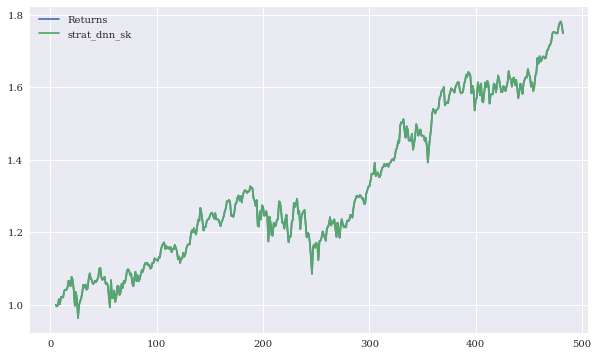

In [25]:
#data_ML[['Returns', 'strat_dnn_sk']].cumsum().apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_ml_12.png');

Now a adding a test-train split is necessary as to avoid overfitting of the DNN model.

In [22]:
train, test = train_test_split(data_ML, test_size=0.33, random_state=100)

In [23]:
train = train.copy().sort_index()  

In [24]:
train[cols_bin].head()

,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin
5,1,1,1,1,1
6,1,1,1,1,1
7,1,1,1,1,1
9,1,0,1,1,1
10,0,1,0,1,1


In [25]:
test = test.copy().sort_index()  

In [26]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=500,
                     hidden_layer_sizes=3 * [500], random_state=1)  

In [27]:
%time model.fit(train[cols_bin], train['direction'])

CPU times: user 33.7 s, sys: 297 ms, total: 34 s
Wall time: 34.1 s


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[500, 500, 500], learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [28]:
test['pos_dnn_sk'] = model.predict(test[cols_bin])

In [29]:
test['strat_dnn_sk'] = test['pos_dnn_sk'] * test['Returns']

In [30]:
test[['Returns', 'strat_dnn_sk']].sum().apply(np.exp)

Returns         1.265743
strat_dnn_sk    1.016987
dtype: float64

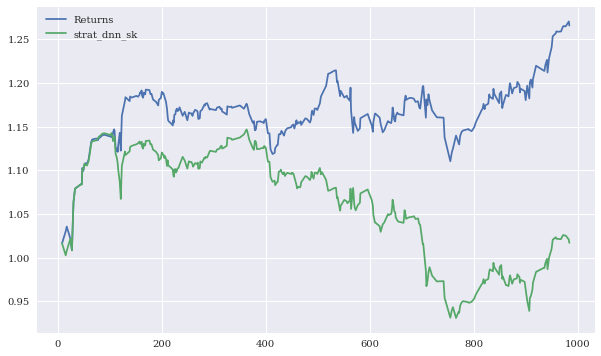

In [31]:
test[['Returns', 'strat_dnn_sk']].cumsum().apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_ml_13.png');

### DNN with TensorFlow

In [32]:
import tensorflow as tf

# tell TensorFlow to tell all messages that have the label error
tf.logging.set_verbosity(tf.logging.ERROR)


In [33]:
fc = [tf.contrib.layers.real_valued_column('lags', dimension=lags)]

In [34]:
model = tf.contrib.learn.DNNClassifier(hidden_units=3 * [500],
                                       n_classes=len(bins) + 1,
                                       feature_columns=fc)

In [35]:
def input_fn():
    fc = {'lags': tf.constant(data_ML[cols_bin].values)}
    la = tf.constant(data_ML['direction'].apply(lambda x: 0 if x < 0 else 1).values,
                     shape=[data_ML['direction'].size, 1])
    return fc, la

In [36]:
%time model.fit(input_fn=input_fn, steps=500)  

CPU times: user 1min 25s, sys: 2.65 s, total: 1min 28s
Wall time: 1min 28s


DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7f0f751d0940>, 'hidden_units': [500, 500, 500], 'feature_columns': (_RealValuedColumn(column_name='lags', dimension=5, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x7f0f835281e0>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [37]:
model.evaluate(input_fn=input_fn, steps=1)  

{'loss': 0.67513871, 'accuracy': 0.57375383, 'global_step': 500}

In [38]:
pred = np.array(list(model.predict(input_fn=input_fn)))  
pred[:10]  

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1])

In [39]:
data_ML['pos_dnn_tf'] = np.where(pred > 0, 1, -1)  

In [40]:
data_ML['strat_dnn_tf'] = data_ML['pos_dnn_tf'] * data_ML['Returns']

In [41]:
data_ML[['Returns', 'strat_dnn_tf']].sum().apply(np.exp)

Returns         1.746065
strat_dnn_tf    2.003696
dtype: float64

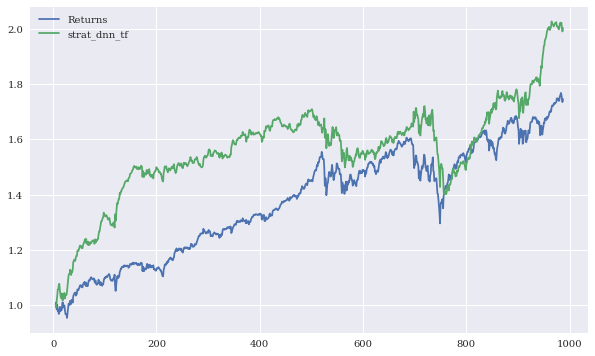

In [42]:
data_ML[['Returns', 'strat_dnn_tf']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_ml_14.png');

In [43]:
model = tf.contrib.learn.DNNClassifier(hidden_units=3 * [500],
                                       n_classes=len(bins) + 1,
                                       feature_columns=fc)

In [44]:
data_ML = train

In [45]:
%time model.fit(input_fn=input_fn, steps=2500)

CPU times: user 4min 48s, sys: 10.7 s, total: 4min 58s
Wall time: 4min 59s


DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7f0f748977b8>, 'hidden_units': [500, 500, 500], 'feature_columns': (_RealValuedColumn(column_name='lags', dimension=5, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x7f0f835281e0>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [46]:
data_ML = test

In [47]:
model.evaluate(input_fn=input_fn, steps=1)

{'loss': 0.69867229, 'accuracy': 0.52615386, 'global_step': 2500}

In [48]:
pred = np.array(list(model.predict(input_fn=input_fn)))

In [49]:
test['pos_dnn_tf'] = np.where(pred > 0, 1, -1)

In [51]:
test['strat_dnn_tf'] = test['pos_dnn_tf'] * test['Returns']

In [54]:
test[['Returns', 'strat_dnn_sk', 'strat_dnn_tf']].sum().apply(np.exp)

Returns         1.265743
strat_dnn_sk    1.016987
strat_dnn_tf    1.037005
dtype: float64

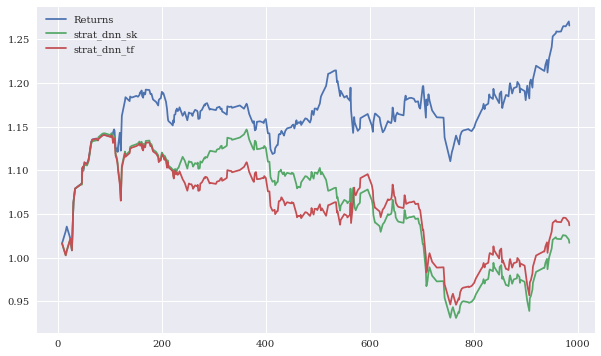

In [55]:
test[['Returns', 'strat_dnn_sk', 'strat_dnn_tf']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_ml_15.png');

# Approach 2

In [ ]:
https://github.com/sebastianheinz/stockprediction/blob/master/02_code/stockprediction.py

In [56]:
# Import
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [64]:
# Drop date variable
data_ML2 = data_ML.drop(['Date'], 1)
data_ML2.dropna()
# Dimensions of dataset
n = data_ML2.shape[0]
p = data_ML2.shape[1]

# Make data a np.array
data = data_ML2.values

In [65]:
'''# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end + 1
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]'''

train, test = train_test_split(data_ML2, test_size=0.33, random_state=100)


# Build X and y
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Number of stocks in training data
n_stocks = X_train.shape[1]

# Neurons
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128

# Session
net = tf.InteractiveSession()

# Placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [ ]:
# Hidden weights
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

# Output weights
W_out = tf.Variable(weight_initializer([n_neurons_4, 1]))
bias_out = tf.Variable(bias_initializer([1]))

# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4)

In [ ]:
# Output layer (transpose!)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

# Init
net.run(tf.global_variables_initializer())

In [ ]:
# Setup plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test * 0.5)
plt.show()

In [ ]:
# Fit neural net
batch_size = 256
mse_train = []
mse_test = []

# Run
epochs = 10
for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})

        # Show progress
        if np.mod(i, 50) == 0:
            # MSE train and test
            mse_train.append(net.run(mse, feed_dict={X: X_train, Y: y_train}))
            mse_test.append(net.run(mse, feed_dict={X: X_test, Y: y_test}))
            print('MSE Train: ', mse_train[-1])
            print('MSE Test: ', mse_test[-1])
            # Prediction
            pred = net.run(out, feed_dict={X: X_test})
            line2.set_ydata(pred)
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            plt.pause(0.01)

Results

Conclusion